TOPSIS Model Evaluation Results:
                        Model  TOPSIS Score  Rank
0                        BERT      0.874962     1
1                     RoBERTa      0.714851     2
2                       SBERT      0.416827     3
4                  DistilBERT      0.143217     4
3  Universal Sentence Encoder      0.129333     5


C:\Users\Garvc\AppData\Local\Temp\ipykernel_23284\1175453955.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df["Model"], y=results_df["TOPSIS Score"], palette="viridis")


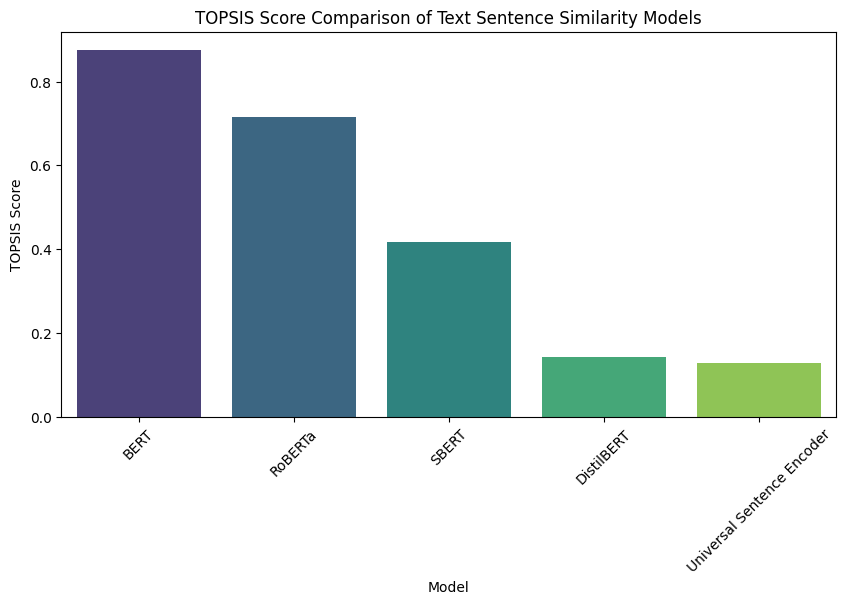

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = ["BERT", "RoBERTa", "SBERT", "Universal Sentence Encoder", "DistilBERT"]

criteria = ["Cosine Similarity (+)", "Inference Speed (-)", "Model Size (-)", "Memory Usage (-)", "Dataset Performance (+)"]

decision_matrix = np.array([
    [0.85, 50, 450, 2.5, 85],  
    [0.88, 40, 500, 2.3, 87],  
    [0.90, 30, 400, 2.1, 90],  
    [0.82, 20, 350, 1.8, 80],  
    [0.84, 25, 300, 1.5, 82]   
])

norm_matrix = decision_matrix / np.sqrt((decision_matrix**2).sum(axis=0))

weights = np.array([0.3, 0.2, 0.15, 0.15, 0.2])

weighted_matrix = norm_matrix * weights

ideal_solution = np.max(weighted_matrix, axis=0)
negative_ideal_solution = np.min(weighted_matrix, axis=0)

distance_ideal = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=1))
distance_negative_ideal = np.sqrt(((weighted_matrix - negative_ideal_solution) ** 2).sum(axis=1))

topsis_scores = distance_negative_ideal / (distance_ideal + distance_negative_ideal)

rankings = np.argsort(topsis_scores)[::-1]

results_df = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": topsis_scores,
    "Rank": rankings + 1
}).sort_values(by="TOPSIS Score", ascending=False)

print("TOPSIS Model Evaluation Results:")
print(results_df)

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df["Model"], y=results_df["TOPSIS Score"], palette="viridis")
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Score Comparison of Text Sentence Similarity Models")
plt.xticks(rotation=45)
plt.show()

results_df.to_csv("topsis_results.csv", index=False)
